**Connecting to Google Drive through mount point setup**

In [3]:
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
drive.flush_and_unmount()

In [4]:
drive.mount('/content/drive')
ROOT = "/content/drive/"

Mounted at /content/drive


In [19]:
file_path = ROOT+"MyDrive/Data_Mining/Grocery_Items_64.csv"

In [20]:
import os
import pandas as pd
import numpy as np
import sys

**Loading the File into pandas DataFrame**

In [21]:
df = pd.read_csv(file_path)

**Applying the Transaction Encoder on Loaded dataset**


In [22]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth,association_rules
import warnings
warnings.simplefilter(action="ignore", category=DeprecationWarning)

In [23]:
te = TransactionEncoder()
df = df.fillna("empty_item")
t_ary = te.fit_transform(df.values.tolist())
df = pd.DataFrame(t_ary, columns=te.columns_)

In [24]:
if "empty_item" in df.columns.tolist():
  df = df.drop(["empty_item"],axis=1)
else:
  print("Empty_item column is not created")

**Extracting the Frequent Itemsets using FPMax approach**

URL reference: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

In [25]:
frequent_itemset = fpgrowth(df,min_support=0.01,use_colnames=True)
extracted_rules = association_rules(frequent_itemset,metric="confidence",min_threshold=0.1)

In [26]:
extracted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(whole milk),0.108375,0.157375,0.015125,0.139562,0.886810,-0.001931,0.979297,-0.125225
1,(other vegetables),(whole milk),0.121500,0.157375,0.015000,0.123457,0.784475,-0.004121,0.961305,-0.238232
2,(yogurt),(whole milk),0.090875,0.157375,0.011500,0.126547,0.804114,-0.002801,0.964706,-0.211328
3,(soda),(whole milk),0.093500,0.157375,0.011375,0.121658,0.773044,-0.003340,0.959336,-0.244639


**Extracting the rules based on given Support and threshold values**

In [27]:
support_values = [0.001, 0.005, 0.01, 0.05]
confidence_values = [0.05, 0.075, 0.1]
all_rules_count = []
for min_support in support_values:
    support_result = []
    frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
    for min_confidence in confidence_values:
        extracted_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
        support_result.append(len(extracted_rules))
    all_rules_count.append(support_result)


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

**Displaying the Extracted Rules count in the form of HeatMap**

([<matplotlib.axis.YTick at 0x79fbfa7cffd0>,
 [Text(0, 0.5, '0.05'), Text(0, 1.5, '0.075'), Text(0, 2.5, '0.1')])

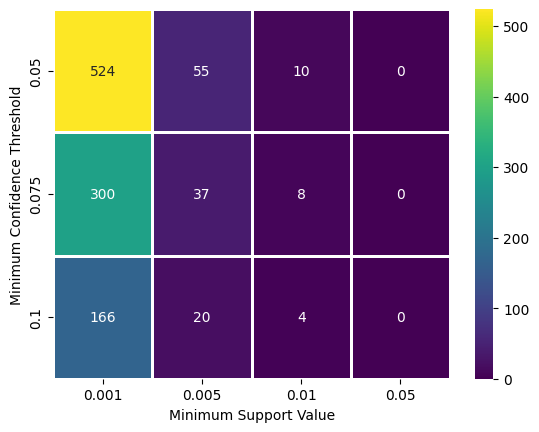

In [29]:
all_rules_count = np.array(all_rules_count)
transposed_data = all_rules_count.T
sns.heatmap(transposed_data,annot=True,linewidths=1,fmt='d',cmap='viridis')
plt.ylabel('Minimum Confidence Threshold')
plt.xlabel('Minimum Support Value')
plt.xticks(np.arange(len(support_values)) + 0.5, support_values)
plt.yticks(np.arange(len(confidence_values)) + 0.5, confidence_values)


In [30]:
min_support_threshold = 0.005
min_confidence_threshold = 0
frequent_itemset = fpgrowth(df, min_support=min_support_threshold, use_colnames=True)
extracted_rules = association_rules(frequent_itemset, metric='confidence', min_threshold=min_confidence_threshold)
max_confidence_value = max(extracted_rules['confidence'].tolist())
max_confidence_rules = extracted_rules[extracted_rules['confidence'] == max_confidence_value]

In [31]:
max_confidence_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
48,(domestic eggs),(whole milk),0.039,0.157375,0.006125,0.157051,0.997943,-0.000013,0.999616,-0.00214


**Maximum confidence values extracted was 0.157051**

**My Banner ID 916433420**

In [32]:
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
batch_size = 30 #considering the batch size as 30

In [34]:
images_location = ROOT+"MyDrive/Data_Mining/parent_folder_images_datasets"

In [35]:
training_images = keras.utils.image_dataset_from_directory(images_location,validation_split=0.2,subset="training",seed=123,image_size=(100,100),batch_size=batch_size)

Found 760 files belonging to 4 classes.
Using 608 files for training.


In [36]:
testing_images =keras.utils.image_dataset_from_directory(images_location,validation_split=0.2,subset="validation",seed=123,image_size=(100,100),batch_size=batch_size)

Found 760 files belonging to 4 classes.
Using 152 files for validation.


In [37]:
training_images = training_images.map(lambda x,y: (x/255, y))
testing_images = testing_images.map(lambda x,y: (x/255, y))

In [50]:
model = keras.Sequential([
          keras.Input(shape=(100,100,3)),
          layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Flatten(),
          layers.Dense(16, activation="relu"),
          layers.Dense(4, activation="softmax"),
          ])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Reference**

https://keras.io/examples/vision/mnist_convnet/

In [51]:
fitting_performance_first= model.fit(training_images , validation_data=testing_images, epochs=35,batch_size=25)

Epoch 1/35
21/21 [==============================] - 4s 146ms/step - loss: 1.5130 - accuracy: 0.3766 - val_loss: 1.3125 - val_accuracy: 0.3487
Epoch 2/35
21/21 [==============================] - 3s 142ms/step - loss: 1.1864 - accuracy: 0.4638 - val_loss: 1.2666 - val_accuracy: 0.4276
Epoch 3/35
21/21 [==============================] - 3s 122ms/step - loss: 1.1178 - accuracy: 0.5197 - val_loss: 1.2037 - val_accuracy: 0.4868
Epoch 4/35
21/21 [==============================] - 3s 107ms/step - loss: 1.0860 - accuracy: 0.5345 - val_loss: 1.1643 - val_accuracy: 0.4868
Epoch 5/35
21/21 [==============================] - 4s 155ms/step - loss: 1.0687 - accuracy: 0.5329 - val_loss: 1.1788 - val_accuracy: 0.4539
Epoch 6/35
21/21 [==============================] - 4s 149ms/step - loss: 1.0492 - accuracy: 0.5461 - val_loss: 1.1566 - val_accuracy: 0.4605
Epoch 7/35
21/21 [==============================] - 3s 122ms/step - loss: 1.0209 - accuracy: 0.5493 - val_loss: 1.1802 - val_accuracy: 0.4539
Epoch 

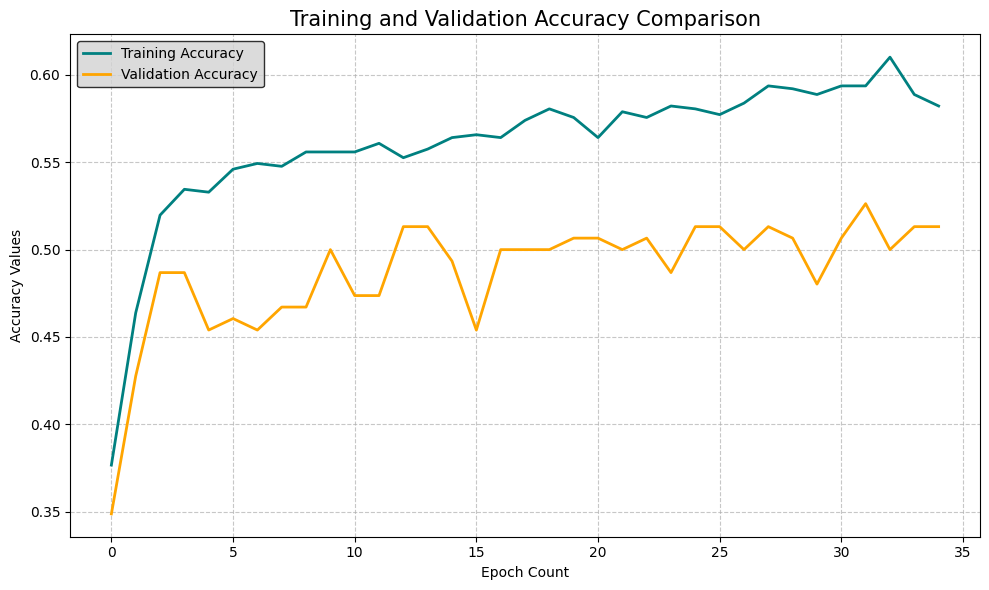

In [52]:

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fitting_performance_first.history['accuracy'], color='teal', label='Training Accuracy', linewidth=2)
ax.plot(fitting_performance_first.history['val_accuracy'], color='orange', label='Validation Accuracy', linewidth=2)
ax.set_title('Training and Validation Accuracy Comparison', fontsize=15)
ax.set_ylabel('Accuracy Values')
ax.set_xlabel('Epoch Count')
ax.grid(True, linestyle='--', alpha=0.7)
legend = ax.legend(loc='upper left', frameon=True, edgecolor='black')
legend.get_texts()[0].set_text('Training Accuracy')
legend.get_texts()[1].set_text('Validation Accuracy')
legend.get_frame().set_facecolor('lightgray')
plt.tight_layout()
plt.show()


In [53]:
model = keras.Sequential([
          keras.Input(shape=(100,100,3)),
          layers.Conv2D(8, kernel_size=(5, 5), activation="relu"),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Flatten(),
          layers.Dense(16, activation="relu"),
          layers.Dense(4, activation="softmax"),
          ])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
fitting_performance_second = model.fit(training_images , validation_data=testing_images, epochs=35,batch_size=25)

Epoch 1/35
21/21 [==============================] - 5s 164ms/step - loss: 1.8112 - accuracy: 0.2829 - val_loss: 1.3725 - val_accuracy: 0.2697
Epoch 2/35
21/21 [==============================] - 4s 154ms/step - loss: 1.3332 - accuracy: 0.3569 - val_loss: 1.3213 - val_accuracy: 0.2763
Epoch 3/35
21/21 [==============================] - 5s 205ms/step - loss: 1.2818 - accuracy: 0.3618 - val_loss: 1.2971 - val_accuracy: 0.3224
Epoch 4/35
21/21 [==============================] - 5s 237ms/step - loss: 1.2267 - accuracy: 0.4112 - val_loss: 1.2376 - val_accuracy: 0.4013
Epoch 5/35
21/21 [==============================] - 4s 169ms/step - loss: 1.1647 - accuracy: 0.4391 - val_loss: 1.1994 - val_accuracy: 0.4079
Epoch 6/35
21/21 [==============================] - 6s 248ms/step - loss: 1.1073 - accuracy: 0.4753 - val_loss: 1.1982 - val_accuracy: 0.3224
Epoch 7/35
21/21 [==============================] - 4s 169ms/step - loss: 1.0389 - accuracy: 0.5296 - val_loss: 1.1743 - val_accuracy: 0.5066
Epoch 

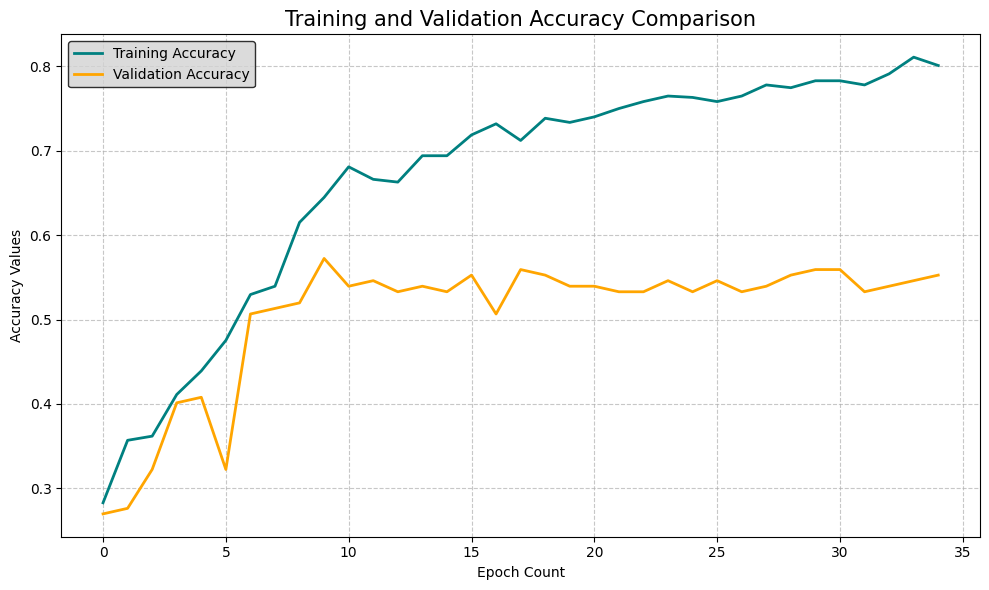

In [55]:

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size
ax.plot(fitting_performance_second.history['accuracy'], color='teal', label='Training Accuracy', linewidth=2)
ax.plot(fitting_performance_second.history['val_accuracy'], color='orange', label='Validation Accuracy', linewidth=2)
ax.set_title('Training and Validation Accuracy Comparison', fontsize=15)
ax.set_ylabel('Accuracy Values')
ax.set_xlabel('Epoch Count')
ax.grid(True, linestyle='--', alpha=0.7)
legend = ax.legend(loc='upper left', frameon=True, edgecolor='black')
legend.get_texts()[0].set_text('Training Accuracy')
legend.get_texts()[1].set_text('Validation Accuracy')
legend.get_frame().set_facecolor('lightgray')
plt.tight_layout()
plt.show()


In [56]:
model = keras.Sequential([
          keras.Input(shape=(100,100,3)),
          layers.Conv2D(8, kernel_size=(7, 7), activation="relu"),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Flatten(),
          layers.Dense(16, activation="relu"),
          layers.Dense(4, activation="softmax"),
          ])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
fitting_performance_thrid = model.fit(training_images , validation_data=testing_images, epochs=35,batch_size=25)

Epoch 1/35
21/21 [==============================] - 9s 357ms/step - loss: 1.3063 - accuracy: 0.3997 - val_loss: 1.1898 - val_accuracy: 0.4211
Epoch 2/35
21/21 [==============================] - 5s 237ms/step - loss: 1.0571 - accuracy: 0.5099 - val_loss: 1.0520 - val_accuracy: 0.4671
Epoch 3/35
21/21 [==============================] - 7s 307ms/step - loss: 0.9006 - accuracy: 0.5921 - val_loss: 0.9320 - val_accuracy: 0.5526
Epoch 4/35
21/21 [==============================] - 5s 238ms/step - loss: 0.8062 - accuracy: 0.6250 - val_loss: 0.8641 - val_accuracy: 0.6053
Epoch 5/35
21/21 [==============================] - 6s 261ms/step - loss: 0.6996 - accuracy: 0.6678 - val_loss: 0.8607 - val_accuracy: 0.5921
Epoch 6/35
21/21 [==============================] - 5s 238ms/step - loss: 0.6516 - accuracy: 0.6941 - val_loss: 0.8592 - val_accuracy: 0.5921
Epoch 7/35
21/21 [==============================] - 5s 237ms/step - loss: 0.6465 - accuracy: 0.6990 - val_loss: 0.9209 - val_accuracy: 0.5921
Epoch 

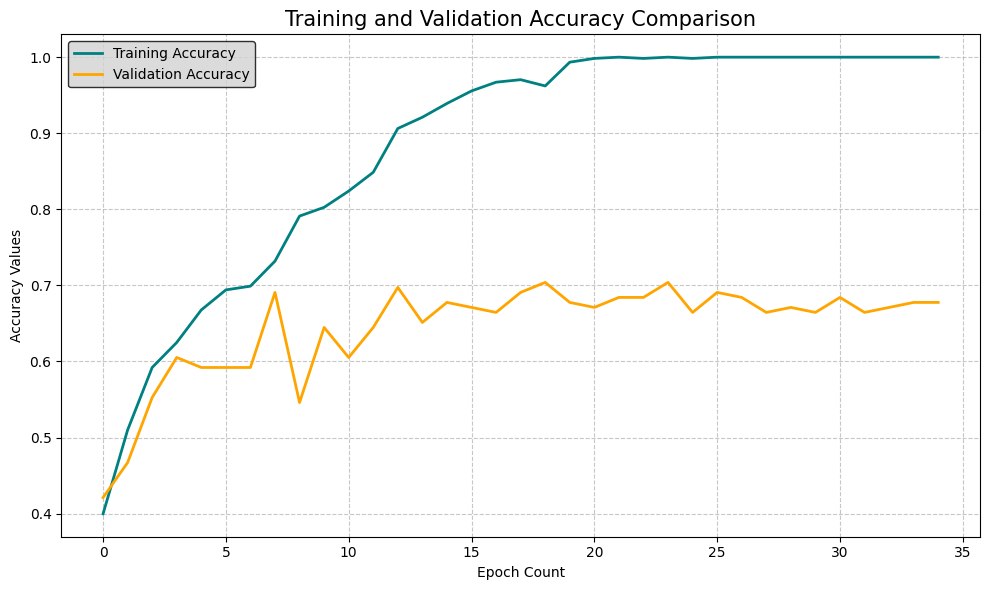

In [58]:

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size
ax.plot(fitting_performance_thrid.history['accuracy'], color='teal', label='Training Accuracy', linewidth=2)
ax.plot(fitting_performance_thrid.history['val_accuracy'], color='orange', label='Validation Accuracy', linewidth=2)
ax.set_title('Training and Validation Accuracy Comparison', fontsize=15)
ax.set_ylabel('Accuracy Values')
ax.set_xlabel('Epoch Count')
ax.grid(True, linestyle='--', alpha=0.7)
legend = ax.legend(loc='upper left', frameon=True, edgecolor='black')
legend.get_texts()[0].set_text('Training Accuracy')
legend.get_texts()[1].set_text('Validation Accuracy')
legend.get_frame().set_facecolor('lightgray')
plt.tight_layout()
plt.show()


On compare the 3 model, i saw thw model with kernel size 7 * 7 have best validation accuracy as shown in the graph on comparing with 3 * 3 and 5 * 5 kernel size. So, I chose the model with kernel size 7*7 is best for my dataset.